In [32]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
train_path = 'C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train'
valid_path = 'C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Test'

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 54s 1us/step


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [25]:
folders = os.listdir('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train')

In [18]:
x = Flatten()(vgg.output)

In [26]:
prediction = Dense(len(folders), activation='softmax')(x)

In [27]:
model = Model(inputs=vgg.input, outputs=prediction)


In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 250 images belonging to 10 classes.
Found 250 images belonging to 10 classes.


In [37]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Shanto\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
8/8 [==============================] - 16s 1s/step - loss: 2.6763 - accuracy: 0.2920 - val_loss: 1.0534 - val_accuracy: 0.6480
Epoch 2/5
8/8 [==============================] - 3s 432ms/step - loss: 0.9305 - accuracy: 0.7120 - val_loss: 0.3682 - val_accuracy: 0.8840
Epoch 3/5
8/8 [==============================] - 3s 437ms/step - loss: 0.4113 - accuracy: 0.8560 - val_loss: 0.1620 - val_accuracy: 0.9600
Epoch 4/5
8/8 [==============================] - 3s 432ms/step - loss: 0.2010 - accuracy: 0.9440 - val_loss: 0.0860 - val_accuracy: 0.9800
Epoch 5/5
8/8 [==============================] - 3s 437ms/step - loss: 0.0915 - accuracy: 0.9880 - val_loss: 0.0538 - val_accuracy: 0.9920


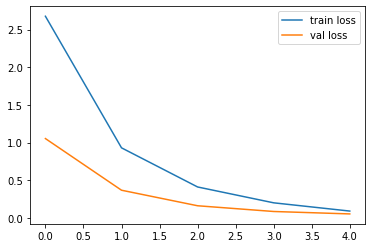

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

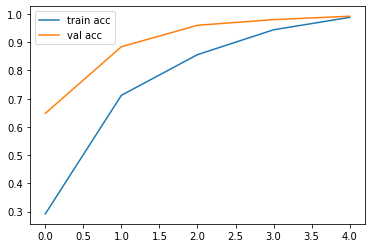

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('thesis_new_model.h5')

In [44]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

In [45]:
def create_foodlist(path):
    list_ = list()
    for root, dirs, files in os.walk(path, topdown=False):
      for name in dirs:
        list_.append(name)
    return list_    

In [47]:
my_model = load_model('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\thesis_vgg16trained_model.h5', compile = False)
food_list = create_foodlist("C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train") 


PREDICTIONS BASED ON PICTURES UPLOADED


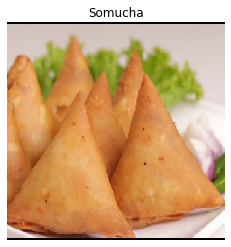

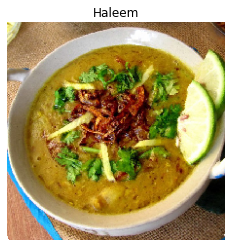

In [49]:

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)    
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

images = []
images.append('singara.jpg')
images.append('haleem.jpg')


print("PREDICTIONS BASED ON PICTURES UPLOADED")
predict_class(my_model, images, True)


In [1]:
from platform import python_version

print(python_version())

3.9.7


In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0
